# Lab 8-kNN

# Imports
    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

# Load Dataset

In [ ]:
iris = pd.read_csv("Iris.csv") #Load Dataset
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris.drop('Id',inplace=True,axis=1) #Drop Id column

In [ ]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = iris.iloc[:,:-1] #Set our training data

y = iris.iloc[:,-1] #Set target labels

# KNN Implementation From Scratch
  



## How the algorithm works

We calculate the distance between a new sample and all points

We determine the label of the sample based on the majority vote

In [ ]:
import numpy as np
from collections import Counter

class KNN:

    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def euclidean_distance(self, x1, x2):

        return np.sqrt(np.sum((x1 - x2) ** 2))

    def manhattan_distance(self, x1, x2):


        return np.sum(np.abs(x1 - x2))

    def fit(self, X_train, y_train):

        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X, distance_metric='euclidean'):

        # Create empty array to store the predictions
        predictions = []
        # Loop over X examples
        for x in X:
            # Get prediction using the prediction helper function
            prediction = self._predict(x, distance_metric)
            # Append the prediction to the predictions list
            predictions.append(prediction)
        return np.array(predictions)

    def _predict(self, x, distance_metric='euclidean'):

        # Create empty array to store distances
        distances = []
        # Loop over all training examples and compute the distance between x and all the training examples
        for x_train in self.X_train:
            if distance_metric == 'euclidean':
                distance = self.euclidean_distance(x, x_train)
            elif distance_metric == 'manhattan':
                distance = self.manhattan_distance(x, x_train)
            distances.append(distance)
        distances = np.array(distances)

        # Sort by ascendingly distance and return indices of the given n neighbours
        n_neighbors_idxs = np.argsort(distances)[:self.n_neighbors]

        # Get labels of n-neighbour indexes
        labels = self.y_train[n_neighbors_idxs]
        labels = list(labels)
        # Get the most frequent class in the array
        most_occuring_value = Counter(labels).most_common(1)[0][0]
        return most_occuring_value
    import matplotlib.pyplot as plt
import numpy as np

class KNN:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2))

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X, distance_metric='euclidean'):
        predictions = []
        for x in X:
            predictions.append(self._predict(x, distance_metric))
        return np.array(predictions)

    def _predict(self, x, distance_metric='euclidean'):
        distances = []
        for x_train in self.X_train:
            if distance_metric == 'euclidean':
                distance = self.euclidean_distance(x, x_train)
            elif distance_metric == 'manhattan':
                distance = self.manhattan_distance(x, x_train)
            distances.append(distance)
        distances = np.array(distances)
        n_neighbors_idxs = np.argsort(distances)[:self.n_neighbors]
        labels = self.y_train[n_neighbors_idxs]
        from collections import Counter
        return Counter(labels).most_common(1)[0][0]

    def visualize(self, x):
        # Visualization only for 2D data
        if self.X_train.shape[1] != 2:
            raise ValueError("Visualization is only supported for 2D data (2 features).")

        # Compute distances to all training points
        distances = np.array([self.euclidean_distance(x, x_train) for x_train in self.X_train])
        n_neighbors_idxs = np.argsort(distances)[:self.n_neighbors]

        # Plot all training points colored by class
        plt.figure(figsize=(8, 6))
        for class_value in np.unique(self.y_train):
            idxs = np.where(self.y_train == class_value)
            plt.scatter(self.X_train[idxs, 0], self.X_train[idxs, 1],
                        label=f'Class {class_value}', alpha=0.6)

        # Highlight the k nearest neighbors
        neighbors = self.X_train[n_neighbors_idxs]
        plt.scatter(neighbors[:, 0], neighbors[:, 1], s=150,
                    facecolors='none', edgecolors='k', label='Neighbors')

        # Plot the query/test point
        predicted_class = self._predict(x)
        plt.scatter(x[0], x[1], c='red', marker='*', s=200,
                    label=f'Query point (Predicted: {predicted_class})')

        plt.title(f'k-NN Visualization (k={self.n_neighbors})')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.grid(True)
        plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state=42) #split the  data into traing and validating

Euclidean Accuracy: 0.97
Manhattan Accuracy: 1.00


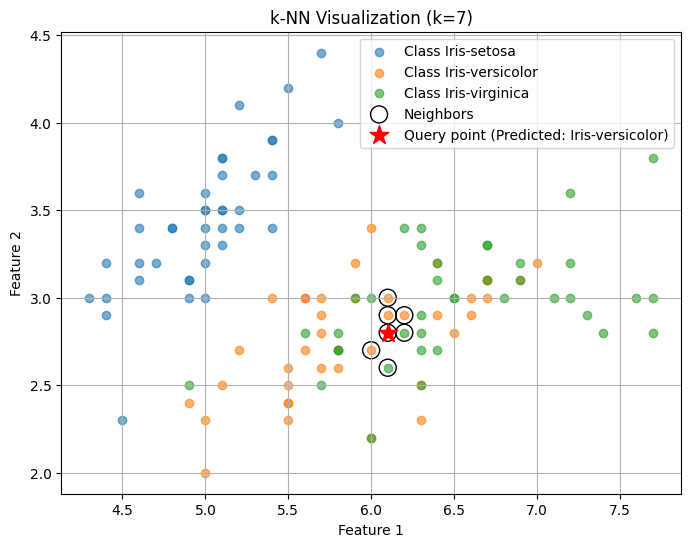

In [ ]:

knn = KNN(n_neighbors=7)
knn.fit(X_train, y_train)

# Euclidean distance
y_pred_euclidean = knn.predict(X_test, distance_metric='euclidean')
acc_euclidean = np.mean(y_pred_euclidean == y_test)
print(f"Euclidean Accuracy: {acc_euclidean:.2f}")

# Manhattan distance
y_pred_manhattan = knn.predict(X_test, distance_metric='manhattan')
acc_manhattan = np.mean(y_pred_manhattan == y_test)
print(f"Manhattan Accuracy: {acc_manhattan:.2f}")


X_vis = X_train[:, :2]
y_vis = y_train


knn_2d = KNN(n_neighbors=7)
knn_2d.fit(X_vis, y_vis)


test_point = X_test[0, :2]

# Visualizes neighbors
knn_2d.visualize(test_point)


In [ ]:
print ("euclidean: " , acc_euclidean)
print ("manhattan: ", acc_manhattan)


euclidean:  0.9666666666666667
manhattan:  1.0


manhattan provides a slightly better result of the two in this case

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X = iris.iloc[:,:-1] #Set our training data

y = iris.iloc[:,-1] #Set target labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize model with k = 3
knn = KNeighborsClassifier(n_neighbors=3)
# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

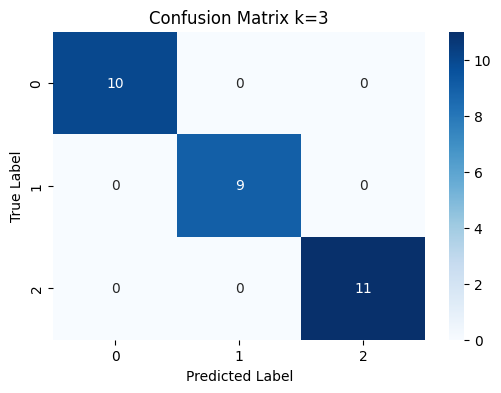


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix k=3')
plt.show()

# Classification Report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)

In [ ]:
# Initialize model with k = 5
knn = KNeighborsClassifier(n_neighbors=5)
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

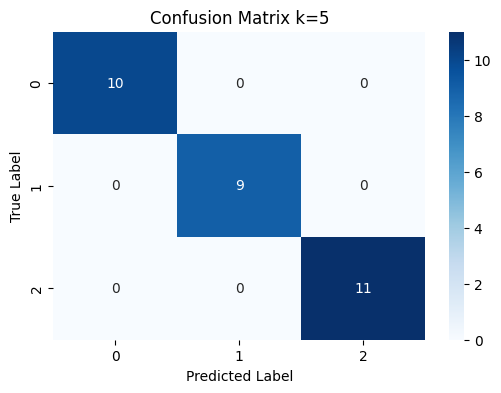


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix k=5')
plt.show()

# Classification Report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)

In [ ]:
# Initialize model with k = 7
knn = KNeighborsClassifier(n_neighbors=7)
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = knn.predict(X_test)

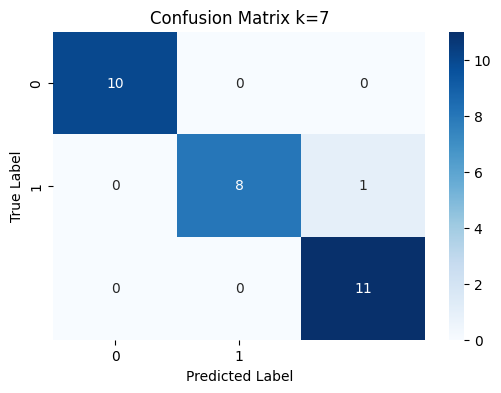


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix k=7')
plt.show()
# Classification Report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)

A large value of k i.e - 7 reduced acuuracy , as the area around the tested object increases , it included far away data points as well


Visualization for k 3
Query Point 1: [4 4]


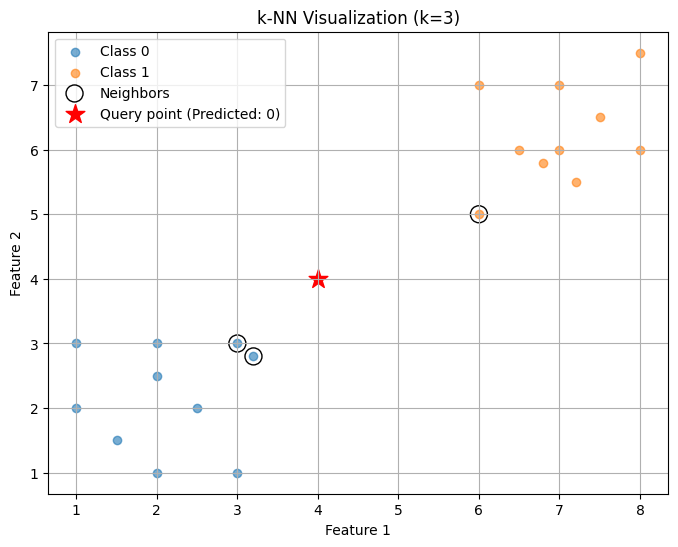

Query Point 2: [5 5]


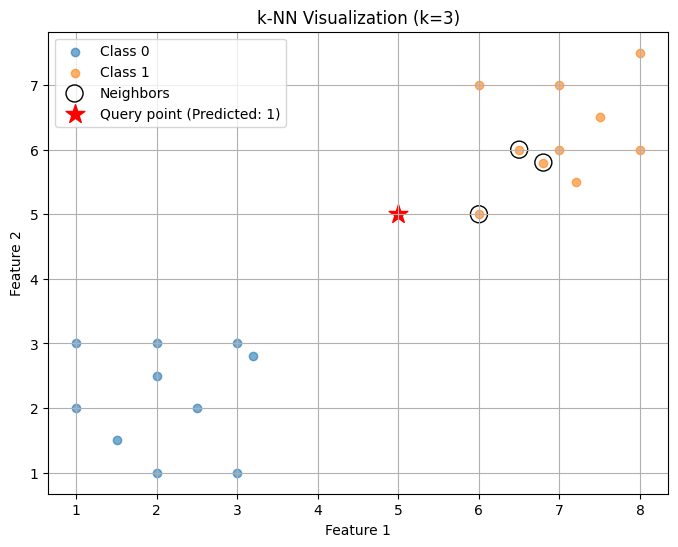

Query Point 3: [3.5 2. ]


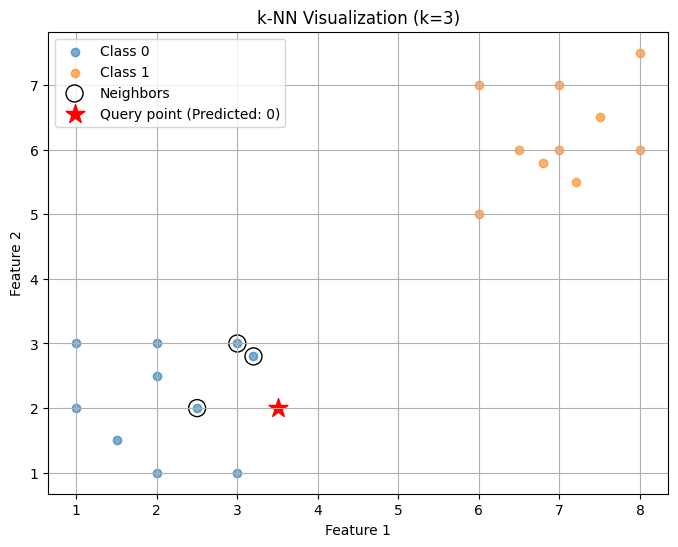


Visualization for k 5
Query Point 1: [4 4]


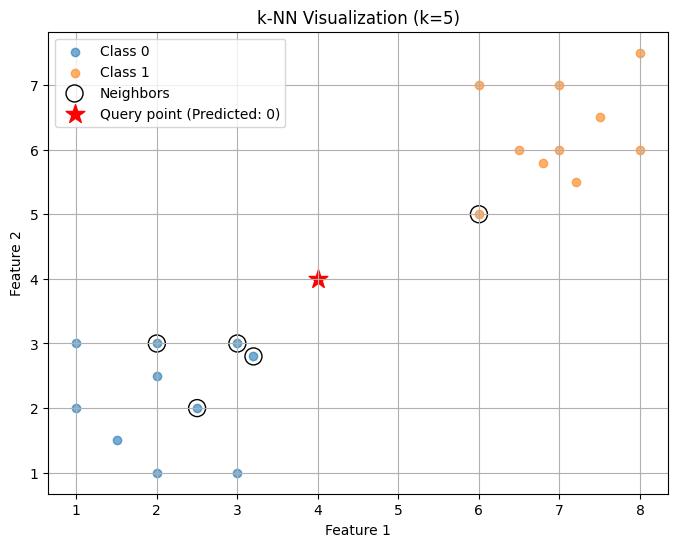

Query Point 2: [5 5]


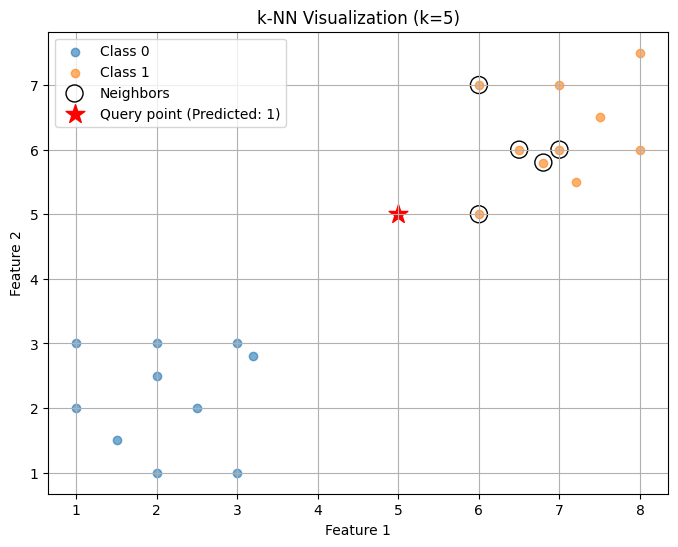

Query Point 3: [3.5 2. ]


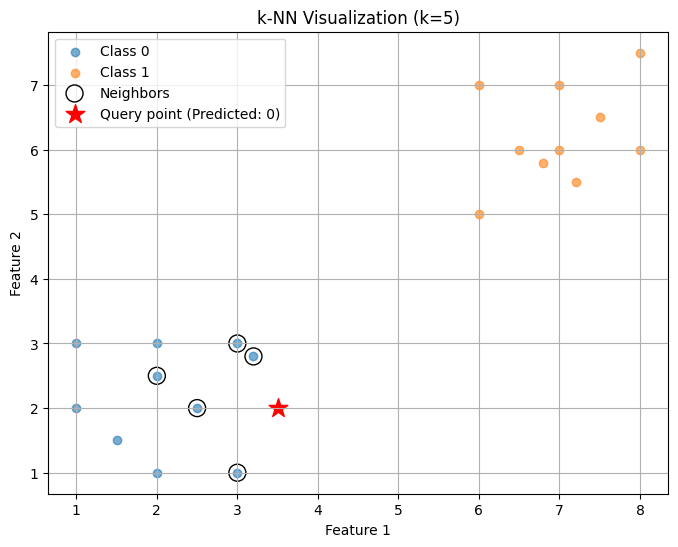

In [ ]:

X_class0 = np.array([
    [1, 2],
    [2, 3],
    [3, 1],
    [2, 1],
    [1, 3],
    [2.5, 2],
    [3, 3],
    [2, 2.5],
    [1.5, 1.5],
    [3.2, 2.8]
])
y_class0 = np.zeros(len(X_class0), dtype=int)


X_class1 = np.array([
    [6, 5],
    [7, 7],
    [8, 6],
    [6.5, 6],
    [7.2, 5.5],
    [8, 7.5],
    [6, 7],
    [7, 6],
    [6.8, 5.8],
    [7.5, 6.5]
])
y_class1 = np.ones(len(X_class1), dtype=int)

# Combine datasets
X_train = np.vstack((X_class0, X_class1))
y_train = np.concatenate((y_class0, y_class1))

# multiple query points
query_points = [
    np.array([4, 4]),
    np.array([5, 5]),
    np.array([3.5, 2]),
]

# two different k values
for k in [3, 5]:
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f"\nVisualization for k {k}")
    for i, query_point in enumerate(query_points, start=1):
        print(f"Query Point {i}: {query_point}")
        knn.visualize(query_point)
